In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df = pd.read_csv('onlinefoods.csv')

In [13]:
df.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   Positive         Yes

In [15]:
df.shape

(388, 13)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


<h1 style="font-size:30px;">Data Cleaning</h1>


In [19]:
df.drop(columns=['Unnamed: 12'], inplace=True)


In [23]:
pd.isnull(df).sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [25]:
df['Monthly Income'] = df['Monthly Income'].replace('No Income', '0')
df['Monthly Income'] = df['Monthly Income'].str.replace('Rs.', '').str.replace('Below ', '')


In [27]:
df.drop_duplicates(inplace=True)


In [29]:
df.head()

Age  Gender Marital Status Occupation Monthly Income  \
0   20  Female         Single    Student              0   
1   24  Female         Single    Student          10000   
2   22    Male         Single    Student          10000   
3   22  Female         Single    Student              0   
4   22    Male         Single    Student          10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback  
0    Yes   Positive  
1    Yes   Positive  
2    Yes  Negative   
3    Yes   Positive  
4    Yes   Positive

In [31]:
df[['Age', 'Family size']].describe()


Age  Family size
count  285.000000   285.000000
mean    24.677193     3.270175
std      3.040977     1.361178
min     18.000000     1.000000
25%     23.000000     2.000000
50%     24.000000     3.000000
75%     26.000000     4.000000
max     33.000000     6.000000

 <h1 style="font-size:30px;">Data Visualization</h1>



In [45]:
import plotly.express as px

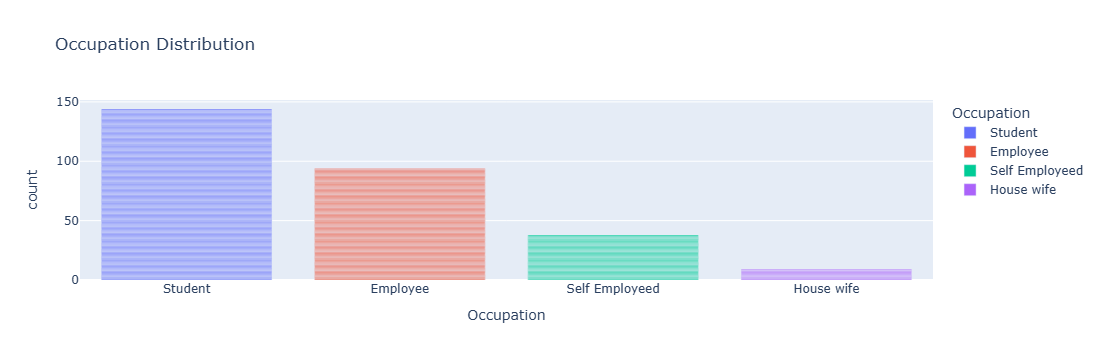

In [47]:
fig = px.bar(df, x='Occupation', title="Occupation Distribution", color='Occupation')
fig.show()


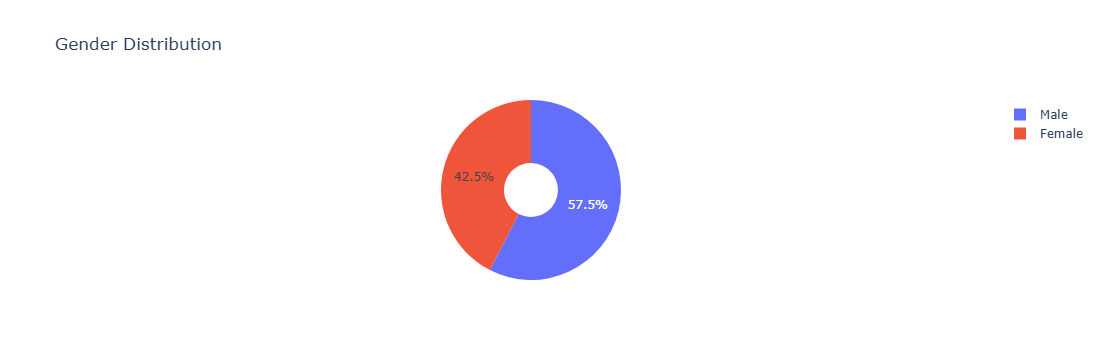

In [49]:
fig = px.pie(df, names='Gender', title="Gender Distribution", hole=0.3)
fig.show()


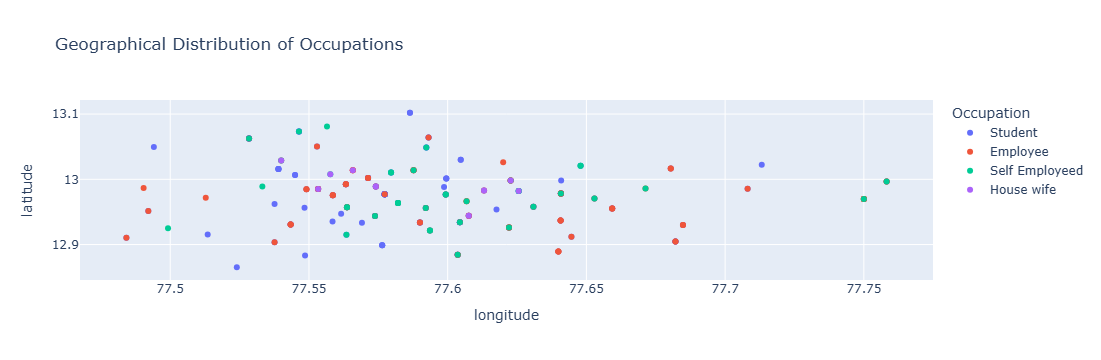

In [53]:
fig = px.scatter(df, x='longitude', y='latitude', color='Occupation', title="Geographical Distribution of Occupations")
fig.show()


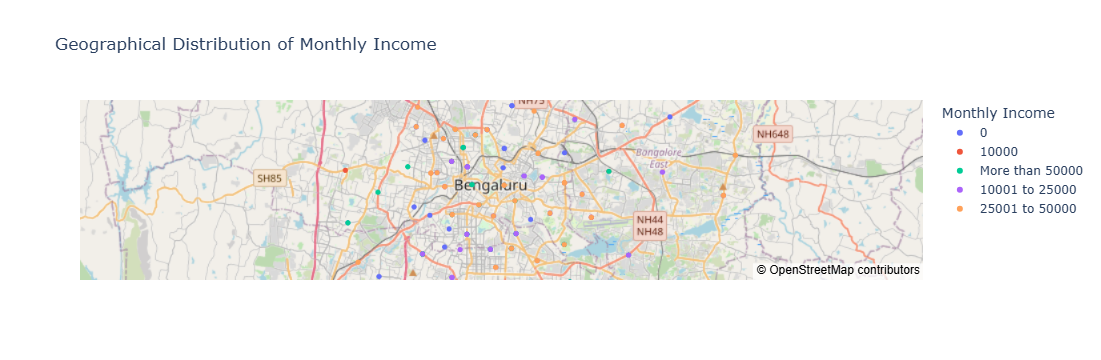

In [59]:
fig = px.scatter_mapbox(df, 
                        lat='latitude', 
                        lon='longitude', 
                        color='Monthly Income', 
                        hover_name='Monthly Income', 
                        title="Geographical Distribution of Monthly Income",
                        mapbox_style="open-street-map",
                        zoom=10)

fig.show()


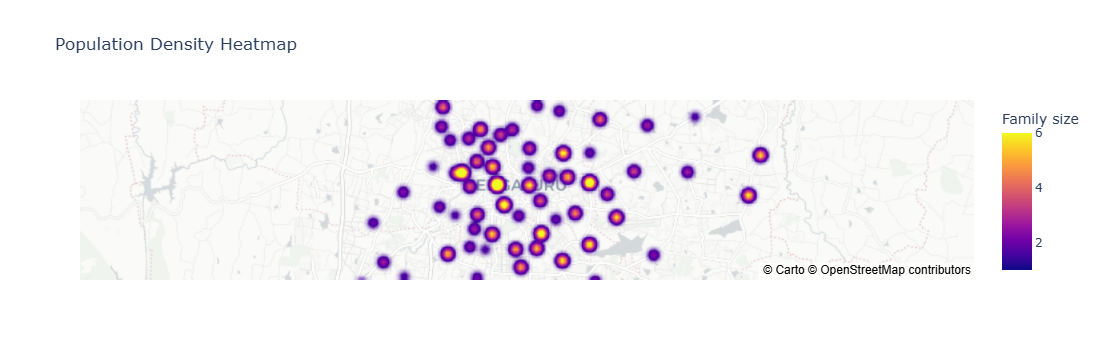

In [61]:
fig = px.density_mapbox(df, 
                        lat='latitude', 
                        lon='longitude', 
                        z='Family size', 
                        radius=10, 
                        title="Population Density Heatmap",
                        mapbox_style="carto-positron",
                        zoom=10)

fig.show()


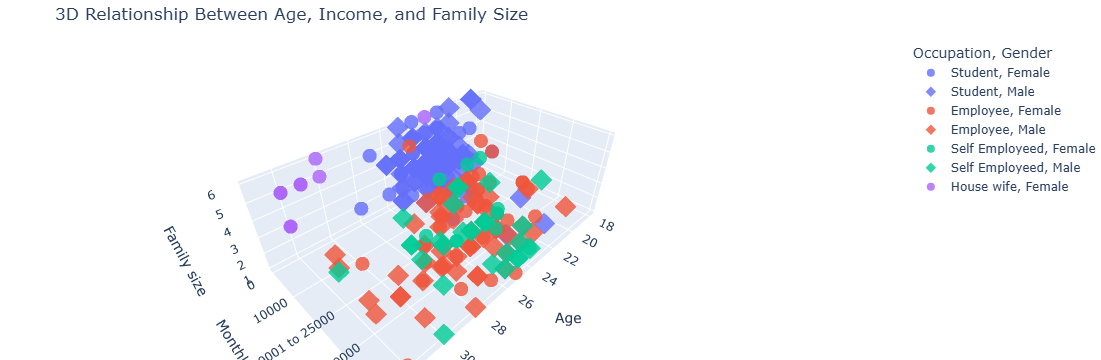

In [75]:
import plotly.express as px

fig = px.scatter_3d(df, 
                     x='Age', 
                     y='Monthly Income', 
                     z='Family size', 
                     color='Occupation', 
                     symbol='Gender',  # Different symbols for Male/Female
                     size_max=10,  # Increase point size
                     opacity=0.8,  # Make points semi-transparent
                     title="3D Relationship Between Age, Income, and Family Size",
                     hover_data=['Marital Status', 'Educational Qualifications'])  # Show extra details

# Adjust camera angle for better view
fig.update_layout(scene=dict(
                    xaxis_title='Age',
                    yaxis_title='Monthly Income',
                    zaxis_title='Family size'),
                    margin=dict(l=0, r=0, b=0, t=40))  # Reduce margins for better fit

fig.show()


